<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Dependencies" data-toc-modified-id="Importing-Dependencies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Dependencies</a></span></li><li><span><a href="#Data-Loading-&amp;-Processing" data-toc-modified-id="Data-Loading-&amp;-Processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Loading &amp; Processing</a></span><ul class="toc-item"><li><span><a href="#Handling-the-Missing-values" data-toc-modified-id="Handling-the-Missing-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Handling the Missing values</a></span></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Analysis</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Encoding-the-Categorical-Columns" data-toc-modified-id="Encoding-the-Categorical-Columns-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Encoding the Categorical Columns</a></span></li></ul></li><li><span><a href="#Separating-features-&amp;-Target" data-toc-modified-id="Separating-features-&amp;-Target-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Separating features &amp; Target</a></span></li><li><span><a href="#Splitting-the-data-into-training-data-&amp;-Test-data" data-toc-modified-id="Splitting-the-data-into-training-data-&amp;-Test-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Splitting the data into training data &amp; Test data</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Save-the-trained-model" data-toc-modified-id="Save-the-trained-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Save the trained model</a></span></li></ul></div>

### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

### Data Loading & Processing

In [2]:
titanic_data = pd.read_csv('titanic_train.csv')

In [3]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
titanic_data.shape

(891, 12)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Handling the Missing values

In [7]:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [8]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [9]:
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [10]:
print(titanic_data['Embarked'].mode()[0])

S


In [11]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [12]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Data Analysis

In [13]:
titanic_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [14]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### Data Visualization

In [15]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

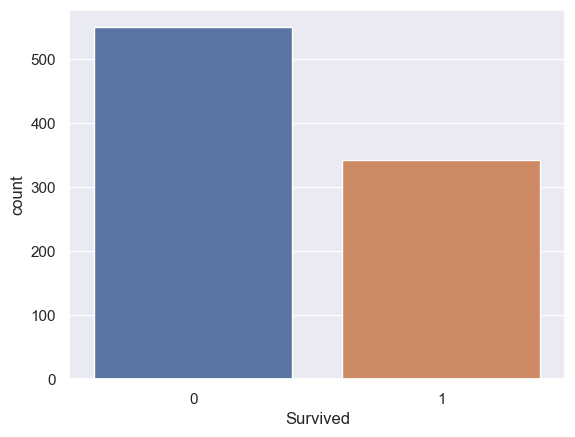

In [16]:
sns.countplot(titanic_data, x='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

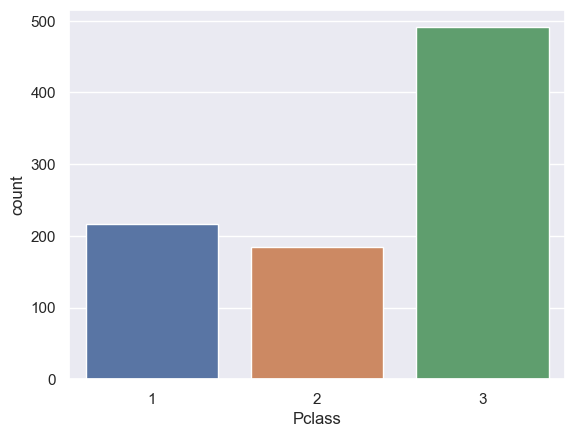

In [17]:
sns.countplot(titanic_data, x='Pclass')

<Axes: xlabel='Pclass', ylabel='count'>

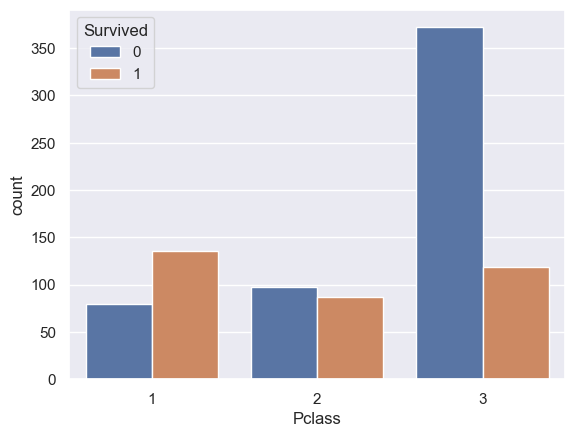

In [18]:
sns.countplot(titanic_data, hue='Survived', x='Pclass')

#### Encoding the Categorical Columns

In [19]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [20]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [21]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [22]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         0  
1          PC 17599  71.2833         1  
2  STON/O2. 3101282   7.9250         0  
3            113803  53.1000         0  
4            373450   8.0500         0

### Separating features & Target

In [23]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

### Splitting the data into training data & Test data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


### Model Training

In [26]:
model = LogisticRegression()

In [27]:
model.fit(X_train, Y_train)

C:\Users\pedro\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

In [28]:
X_train_prediction = model.predict(X_train)

In [29]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [30]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8075842696629213


In [31]:
X_test_prediction = model.predict(X_test)

In [32]:
X_test

Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
707       1    0  42.000000      0      0  26.2875         0
37        3    0  21.000000      0      0   8.0500         0
615       2    1  24.000000      1      2  65.0000         0
169       3    0  28.000000      0      0  56.4958         0
68        3    1  17.000000      4      2   7.9250         0
..      ...  ...        ...    ...    ...      ...       ...
89        3    0  24.000000      0      0   8.0500         0
80        3    0  22.000000      0      0   9.0000         0
846       3    0  29.699118      8      2  69.5500         0
870       3    0  26.000000      0      0   7.8958         0
251       3    1  29.000000      1      1  10.4625         0

[179 rows x 7 columns]

In [33]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [34]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', round(test_data_accuracy, 2))

Accuracy score of test data :  0.78


### Save the trained model

In [35]:
filename = 'models/titanic_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [36]:
loaded_model = pickle.load(open("models/titanic_model.sav", 'rb'))